<a href="https://colab.research.google.com/github/Soy1997/Google-Search-Analysis/blob/main/Google_Search_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pytrends matplotlib pandas seaborn plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# setup pytrend libraries and keyword define

In [3]:
pytrends = TrendReq(hl = 'en-US',tz = 360)
keyword = 'cloud computing'

# Data Request

In [4]:
pytrends.build_payload([keyword],cat=0,timeframe ='today 12-m',geo='',gprop ='')

# country Wise interest

In [5]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)


/tmp/ipython-input-612436799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword],y = region_data.index, palette = 'Blues_d')


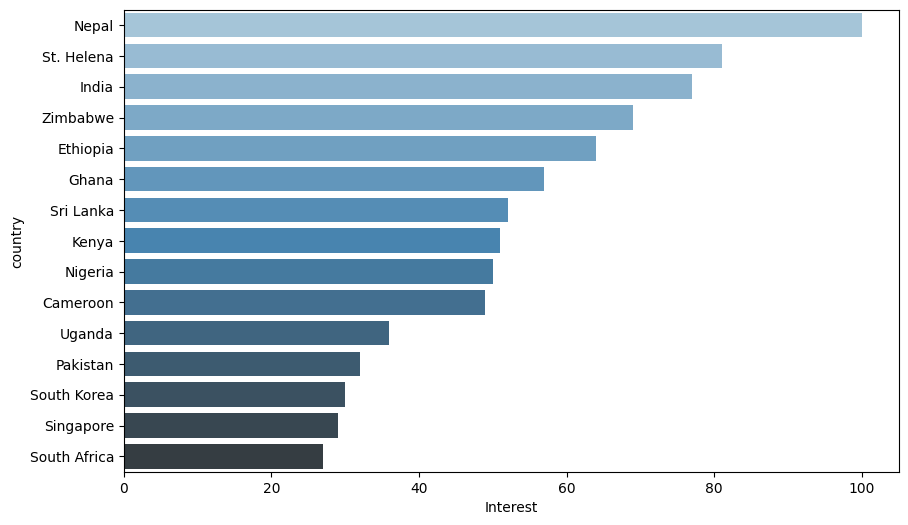

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x = region_data[keyword],y = region_data.index, palette = 'Blues_d')
plt.title = (f"Top countries search for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("country")
plt.show()

# World Map

In [7]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations= 'geoName',
                    locationmode = 'country names',
                    color = keyword,
                    title = f"Search Interest for '{keyword}' by country",
                    color_continuous_scale ='Blues')
fig.show()

# Time Wise Interest

In [8]:
time_df = pytrends.interest_over_time()

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



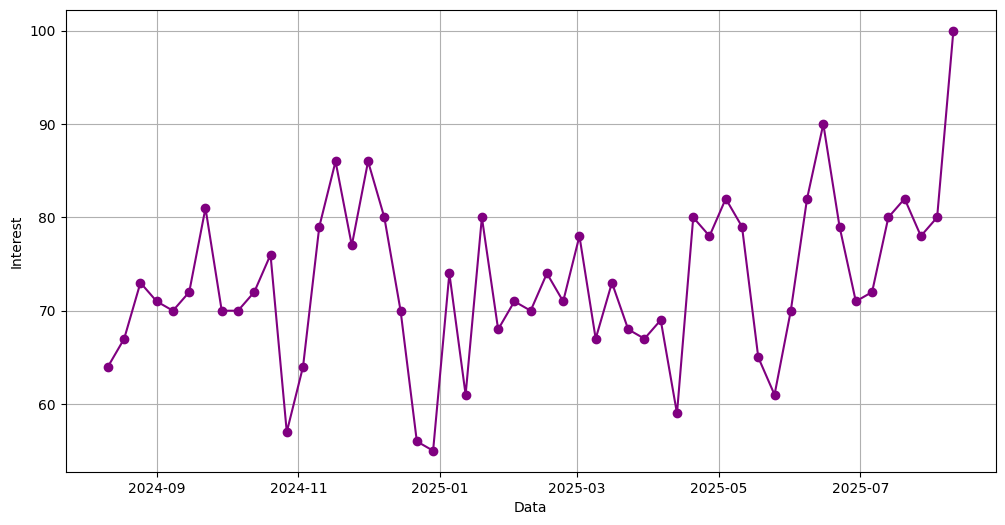

In [9]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword],marker='o',color ='purple')
plt.title = f"Search interest over Time '{keyword}'"
plt.xlabel("Data")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple Keyword Compare

In [10]:
kw_list = ["Cloud Computing","Data Science","Machine Learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m',geo='', gprop='')


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



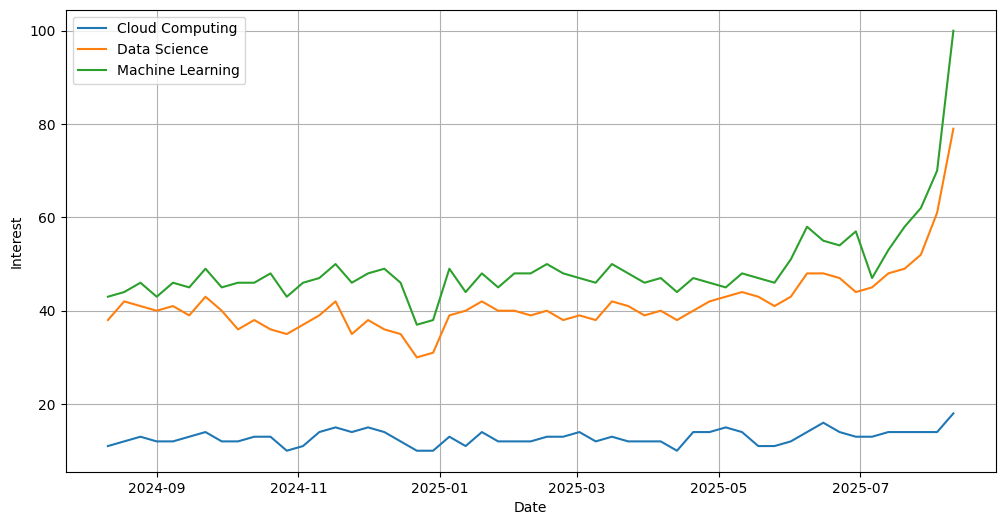

In [11]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
  plt.plot(compare_df.index, compare_df[kw],label=kw)

plt.title = "Keyword comprasion over time"
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.show()